In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
raw_data = pd.read_csv(r'C:\Users\saran\Desktop\up-skill\PGP - DSBA\Data Mining\Bank Dataset.csv')
raw_data.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df_rc = raw_data.drop({'ID','ZIP_Code'},axis=1)

In [6]:
df_rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4982 non-null   int64  
 1   Experience          4982 non-null   int64  
 2   Income              4982 non-null   int64  
 3   Family_members      4982 non-null   int64  
 4   CCAvg               4982 non-null   float64
 5   Education           4982 non-null   int64  
 6   Mortgage            4982 non-null   int64  
 7   Personal_Loan       4982 non-null   int64  
 8   Securities_Account  4982 non-null   int64  
 9   CD_Account          4982 non-null   int64  
 10  Online              4982 non-null   int64  
 11  CreditCard          4982 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 467.2 KB


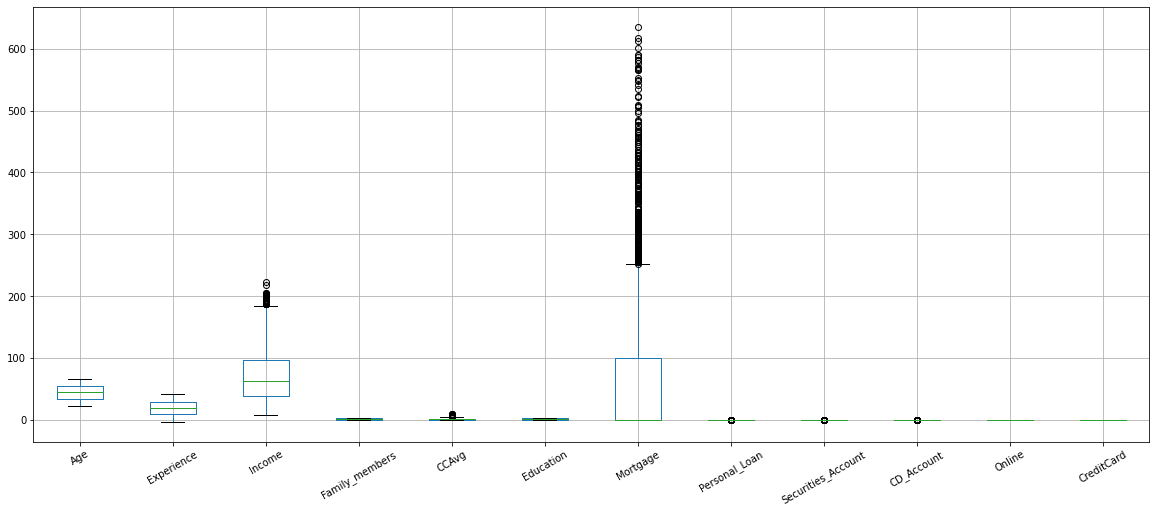

In [11]:
df_rc.boxplot(figsize=(20,8))
plt.xticks(rotation=30)
plt.show()

In [32]:
X = df_rc.drop(['Personal_Loan'],axis =1)

y = df_rc['Personal_Loan']

In [41]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state=1)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()

In [44]:
X_train = ss.fit_transform(X_train)

X_train

array([[ 0.75866264,  0.34199978, -0.10107067, ..., -0.25823838,
         0.81708209, -0.64657259],
       [ 1.54405303,  1.47477723,  0.13943853, ..., -0.25823838,
         0.81708209,  1.54661674],
       [ 1.19499064,  1.30050378,  0.44554114, ..., -0.25823838,
        -1.22386723, -0.64657259],
       ...,
       [ 1.02045944,  1.0390936 , -0.86632721, ..., -0.25823838,
        -1.22386723, -0.64657259],
       [-1.33571173, -1.2264613 , -1.32548114, ..., -0.25823838,
         0.81708209, -0.64657259],
       [ 0.49686585,  0.51627324, -0.0792062 , ..., -0.25823838,
        -1.22386723, -0.64657259]])

In [45]:
X_test = ss.transform(X_test)

X_test

array([[-0.98664934, -1.13932457, -0.47276671, ..., -0.25823838,
         0.81708209, -0.64657259],
       [-0.28852455, -0.18082058,  1.49503583, ..., -0.25823838,
         0.81708209, -0.64657259],
       [-1.59750853, -1.48787148, -1.21615877, ..., -0.25823838,
        -1.22386723, -0.64657259],
       ...,
       [ 1.10772504,  1.0390936 ,  0.88283059, ..., -0.25823838,
         0.81708209, -0.64657259],
       [ 0.75866264,  0.34199978, -0.53836012, ..., -0.25823838,
         0.81708209, -0.64657259],
       [ 1.71858423,  1.82332414,  0.68605034, ...,  3.8723911 ,
         0.81708209, -0.64657259]])

In [58]:
mlpc = MLPClassifier(hidden_layer_sizes=(120,120,120), max_iter=5000, verbose=True, solver='sgd', random_state=1, tol=0.0001)

In [60]:
mlpc.fit(X_train,train_labels)

Iteration 1, loss = 0.68980312
Iteration 2, loss = 0.54799848
Iteration 3, loss = 0.44734528
Iteration 4, loss = 0.38817673
Iteration 5, loss = 0.35205023
Iteration 6, loss = 0.32904701
Iteration 7, loss = 0.31293739
Iteration 8, loss = 0.30051191
Iteration 9, loss = 0.29043974
Iteration 10, loss = 0.28155176
Iteration 11, loss = 0.27337920
Iteration 12, loss = 0.26582561
Iteration 13, loss = 0.25869307
Iteration 14, loss = 0.25182765
Iteration 15, loss = 0.24511376
Iteration 16, loss = 0.23879464
Iteration 17, loss = 0.23273369
Iteration 18, loss = 0.22698638
Iteration 19, loss = 0.22150357
Iteration 20, loss = 0.21627677
Iteration 21, loss = 0.21141995
Iteration 22, loss = 0.20689829
Iteration 23, loss = 0.20244701
Iteration 24, loss = 0.19837590
Iteration 25, loss = 0.19448776
Iteration 26, loss = 0.19073579
Iteration 27, loss = 0.18714290
Iteration 28, loss = 0.18377279
Iteration 29, loss = 0.18059761
Iteration 30, loss = 0.17753027
Iteration 31, loss = 0.17459983
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(120, 120, 120), max_iter=5000, random_state=1,
              solver='sgd', verbose=True)

In [63]:
ytrain_predict = mlpc.predict(X_train)
ytest_predict = mlpc.predict(X_test)

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

0.9949790507589806


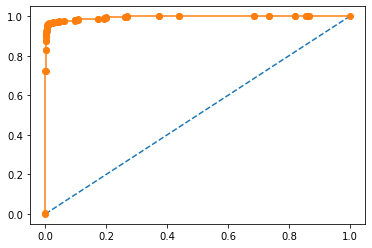

In [69]:
probs = mlpc.predict_proba(X_train)[:,1]
auc_dev = roc_auc_score(train_labels, probs)
print(auc_dev)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

In [66]:
#Train data Confusion Matrix
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(mlpc.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))

[[3157    8]
 [  27  295]]
0.9899627186693433
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3165
           1       0.97      0.92      0.94       322

    accuracy                           0.99      3487
   macro avg       0.98      0.96      0.97      3487
weighted avg       0.99      0.99      0.99      3487



0.9867534133777599


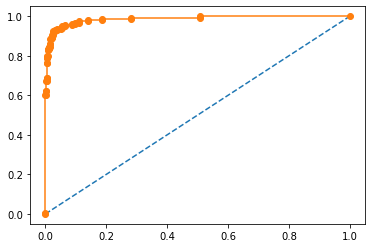

In [70]:
probt = mlpc.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(test_labels, probt)
print(auc_test)
fpr, tpr, thresholds = roc_curve(test_labels, probt)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

In [68]:
#Test data Confusion Matrix
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(mlpc.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

[[1328   11]
 [  27  129]]
0.974581939799331
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1339
           1       0.92      0.83      0.87       156

    accuracy                           0.97      1495
   macro avg       0.95      0.91      0.93      1495
weighted avg       0.97      0.97      0.97      1495

